# Leitura e Escrita de Arquivos de Planilha

Grande parte da informação que é manipulada no terceiro setor e na indústria encontra-se estruturada na forma de planilhas intercambiáveis entre programas bem conhecidos, tais como _Microsoft Excel_, _LibreOffice Calc_ e _Apple Numbers_. Planilhas compõem-se de tabelas que contém texto e números dispostos em células. 

Hoje em dia, o formato de arquivo `.csv` (_comma separated values_), ou _valores separados com vírgula_, tem ganhado notoriedade em diversas áreas, principalmente ciência e análise de dados. Para um engenheiro, a linguagem Python pode oferecer uma enorme gama de utilidades para tratamento de dados tabelados, permitindo que o trabalho conjunto com softwares de planilha seja expandido.

Neste capítulo, aprenderemos a ler e a escrever arquivos em formato `.csv` para realizar análises e cálculos estatísticos básicos, dando enfoque à biblioteca _Pandas_.

## Motivação 

O arquivo [autos.csv](./data/autos.csv) contém uma planilha relacionando modelos automotivos com sua massa (em kg) e consumo (em km/litro). Usaremos essas informações para realizar algumas análises. 

## Leitura de arquivos

Usaremos a função `read_csv` para ler o arquivo.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('./data/autos.csv')
df

,modelo,massa (kg),C (km/litro)
0,Focus,1198,11.90
1,Crown Victoria,1715,6.80
2,Expedition,2530,5.53
3,Explorer,2014,6.38
4,F-150,2136,5.53
5,Fusion,1492,8.50
6,Taurus,1652,7.65
7,Fit,1168,13.60
8,Accord,1492,9.78
9,CR-V,1602,8.93


## _Series_ e _DataFrames_

A variável `df` é um _DataFrame_, uma tabela (bidimensional) com cada coluna formada como uma _Series_. Uma _Series_ (série) é um _array_ unidimensional que possui um índice para cada entrada e tipos de dados variáveis.

### Selecionando colunas e valores

Para acessar as colunas, usamos indexação:

In [2]:
modelo = df['modelo']
modelo

0              Focus
1     Crown Victoria
2         Expedition
3           Explorer
4              F-150
5             Fusion
6             Taurus
7                Fit
8             Accord
9               CR-V
10             Civic
11         Ridgeline
Name: modelo, dtype: object

Para acessar os valores, usamos `values`:

In [3]:
modelo.values

array(['Focus', 'Crown Victoria', 'Expedition', 'Explorer', 'F-150',
       'Fusion', 'Taurus', 'Fit', 'Accord', 'CR-V', 'Civic', 'Ridgeline'],
      dtype=object)

Notemos que `modelo` é uma série, mas `modelo.values` é um _array_ 1D.

In [4]:
type(modelo)

pandas.core.series.Series

In [5]:
type(modelo.values)

numpy.ndarray

Enquanto a série acima armazena objetos `str`, as demais armazenam valores numéricos.

In [6]:
massa = df['massa (kg)'].values
massa

array([1198, 1715, 2530, 2014, 2136, 1492, 1652, 1168, 1492, 1602, 1192,
       2045])

In [7]:
consumo = df['C (km/litro)'].values
consumo

array([11.9 ,  6.8 ,  5.53,  6.38,  5.53,  8.5 ,  7.65, 13.6 ,  9.78,
        8.93, 11.9 ,  6.38])

### Renomeando colunas

Vamos renomear as colunas através de um `dict` para facilitar a manipulação.

In [8]:
# mapa de renomeação
n = {'massa (kg)':'M',
     'C (km/litro)':'C' }

# renomeia colunas
df = df.rename(columns=n)
df

,modelo,M,C
0,Focus,1198,11.90
1,Crown Victoria,1715,6.80
2,Expedition,2530,5.53
3,Explorer,2014,6.38
4,F-150,2136,5.53
5,Fusion,1492,8.50
6,Taurus,1652,7.65
7,Fit,1168,13.60
8,Accord,1492,9.78
9,CR-V,1602,8.93


### Identificando máximos, mínimos e médias

Buscando os valores para _massa_:

In [9]:
# máximo
df['M'].max()

2530

In [10]:
# mínimo
df['M'].min()

1168

In [11]:
# média
df['M'].mean()

1686.3333333333333

Buscando os valores para _consumo_:

In [12]:
# máximo
df['C'].max()

13.6

In [13]:
# mínimo
df['C'].min()

5.53

In [14]:
# média
df['C'].mean()

8.573333333333332

Encontrando os índices correspondentes:

In [15]:
np.argmin(df['M'])

7

In [16]:
np.argmax(df['M'])

2

In [17]:
np.argmin(df['C'])

2

In [18]:
np.argmax(df['C'])

7

## Acessando dados por índice

Primeiramente, notemos que os índices forma um array. 

In [19]:
df.index

RangeIndex(start=0, stop=12, step=1)

In [20]:
# converte para array
df.index.to_numpy()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11])

Para acessar entradas pelo índice usamos `iloc`.

In [21]:
# massa máxima no índice 2
df.iloc[2]['M']

2530

In [22]:
# consumo máximo no índice 7
df.iloc[7]['C']

13.6

## Selecionando subtabelas

In [23]:
df.iloc[0:5]

,modelo,M,C
0,Focus,1198,11.90
1,Crown Victoria,1715,6.80
2,Expedition,2530,5.53
3,Explorer,2014,6.38
4,F-150,2136,5.53


In [24]:
# salto de 2
df.iloc[::2]

,modelo,M,C
0,Focus,1198,11.90
2,Expedition,2530,5.53
4,F-150,2136,5.53
6,Taurus,1652,7.65
8,Accord,1492,9.78
10,Civic,1192,11.90


Restringindo colunas:

In [25]:
df.iloc[0:2]['M']

0    1198
1    1715
Name: M, dtype: int64

In [26]:
# apenas considera colunas 'M' e 'C'
df.iloc[3:9][['M','C']]

,M,C
3,2014,6.38
4,2136,5.53
5,1492,8.50
6,1652,7.65
7,1168,13.60
8,1492,9.78


## Plotando dados

Podemos plotar dados diretamente a partir das séries.

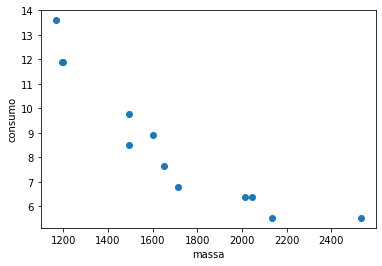

In [27]:
plt.plot(df['M'],df['C'],'o')
plt.xlabel('massa')
plt.ylabel('consumo');

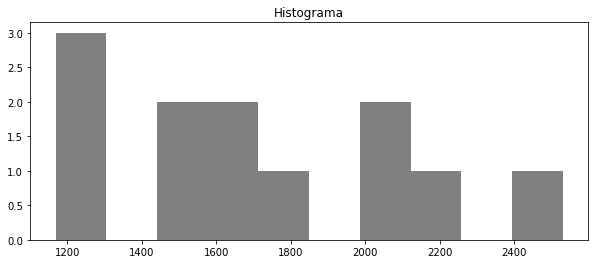

In [28]:
plt.figure(figsize=(10,4))
plt.hist(df['M'],color=[0.5,0.5,0.5])
plt.title('Histograma');

## Adicionando colunas

Suponhamos que queiramos computar o índice massa/consumo e seu inverso e adicioná-los como colunas em nossa planilha. Podemos fazer isso diretamente com:

In [29]:
# cria coluna 'M/C'
df['M/C'] = df['M']/df['C']
df['C/M'] = 1./df['M/C']
df

,modelo,M,C,M/C,C/M
0,Focus,1198,11.90,100.672269,0.009933
1,Crown Victoria,1715,6.80,252.205882,0.003965
2,Expedition,2530,5.53,457.504521,0.002186
3,Explorer,2014,6.38,315.673981,0.003168
4,F-150,2136,5.53,386.256781,0.002589
5,Fusion,1492,8.50,175.529412,0.005697
6,Taurus,1652,7.65,215.947712,0.004631
7,Fit,1168,13.60,85.882353,0.011644
8,Accord,1492,9.78,152.556237,0.006555
9,CR-V,1602,8.93,179.395297,0.005574


## Escrita de arquivos

Para exportar nossa nova planilha para um novo arquivo, digamos `autos-novo.csv`, fazemos:

In [30]:
df.to_csv('data/autos-novo.csv',index=False)

Podemos checar novamente o conteúdo do novo arquivo com:

In [31]:
dfnovo = pd.read_csv('data/autos-novo.csv')
dfnovo

,modelo,M,C,M/C,C/M
0,Focus,1198,11.90,100.672269,0.009933
1,Crown Victoria,1715,6.80,252.205882,0.003965
2,Expedition,2530,5.53,457.504521,0.002186
3,Explorer,2014,6.38,315.673981,0.003168
4,F-150,2136,5.53,386.256781,0.002589
5,Fusion,1492,8.50,175.529412,0.005697
6,Taurus,1652,7.65,215.947712,0.004631
7,Fit,1168,13.60,85.882353,0.011644
8,Accord,1492,9.78,152.556237,0.006555
9,CR-V,1602,8.93,179.395297,0.005574


Caso seu arquivo seja muito grande, é possível visualizar parte dele usando `head` e `tail`.

In [32]:
# 'cabeça' do arquivo
dfnovo.head()

,modelo,M,C,M/C,C/M
0,Focus,1198,11.90,100.672269,0.009933
1,Crown Victoria,1715,6.80,252.205882,0.003965
2,Expedition,2530,5.53,457.504521,0.002186
3,Explorer,2014,6.38,315.673981,0.003168
4,F-150,2136,5.53,386.256781,0.002589


In [33]:
# 'cauda' do arquivo
dfnovo.tail()

,modelo,M,C,M/C,C/M
7,Fit,1168,13.60,85.882353,0.011644
8,Accord,1492,9.78,152.556237,0.006555
9,CR-V,1602,8.93,179.395297,0.005574
10,Civic,1192,11.90,100.168067,0.009983
11,Ridgeline,2045,6.38,320.532915,0.003120


## Estatística Descritiva

Algumas medidas importantes da estatística podem ser calculadas diretamente com _DataFrames_. Aqui, aprenderemos a calcular duas classes:

- medidas de posição: média, moda, mediana
- medidas de dispersão: amplitude, desvio médio, desvio padrão, variância

### Medidas de posição

In [34]:
# consumo
c = df['C']

In [35]:
# média
c.mean()

8.573333333333332

In [36]:
# moda: valores mais frequentes
c.mode()

0     5.53
1     6.38
2    11.90
dtype: float64

In [37]:
# mediana
c.median()

8.075

### Medidas de dispersão

In [38]:
# amplitude
c.max() - c.min()

8.07

In [39]:
# desvio médio
c.mad()

2.2072222222222218

In [40]:
# desvio padrão
c.std()

2.715810052714336

In [41]:
# variância
c.var()

7.375624242424243